In [4]:
import numpy as np
import h5py
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import display
from PIL import Image
import ast
import time as tt

In [5]:
# get simulation time details
def convert_hecras_timedata(time_data):
    time_series = []
    for tstep in time_data:
        time_str = tstep.decode('UTF-8')  # Convert byte data to str
        time_stamp = datetime.strptime(time_str, '%d%b%Y %H:%M:%S')  # Convert to datetime
        time_series.append(time_stamp)  # Append timestep to timeseries

    time = np.array(time_series)  # Convert to numpy array
    return time

def get_timedata(path):
    hec = h5py.File(path, 'r')  # Open to read data
    # Get time data
    time_data = hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series'] \
        ['Time Date Stamp']

    time = convert_hecras_timedata(time_data)

    hec.close()  # Close

    return time

#### Read HDF file

In [6]:
hec_result_path = "../data/datasets/raw/HEC-RAS_Results/BeaverLAKE_Pipe_Mod.p22.hdf"
hec = h5py.File(hec_result_path, 'r')
time_list = get_timedata(hec_result_path)
value = np.array(hec['Geometry']['2D Flow Areas'])[6]
value

np.str_('US Beaver')

### 1. Dynamic Features
#### 1.1 1D Node Features
##### To get the location of each 1D nodes, refer to the Nodes_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.1.1 Water Levels (units: fts)

In [7]:
WSE = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Water Surface'])
column_names = [str(i) for i in range(WSE.shape[1])]
WSE = pd.DataFrame(WSE, columns=column_names)
WSE.insert(0, "Time", time_list)
WSE = WSE.set_index('Time')
WSE

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Time,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,292.136108,286.600006,310.099701,309.178406,310.384491,313.185455,324.916504,345.260651,347.952454,312.250000,295.783966,292.846039,295.007721,297.620544,297.261414,297.465240,304.053833
2025-10-02 00:05:00,292.136108,286.600006,310.099701,309.178406,310.384491,313.185455,324.916504,345.260651,347.952454,312.250000,295.783966,292.846039,295.007721,297.620544,297.261414,297.465240,304.053833
2025-10-02 00:10:00,292.136108,286.600006,310.099701,309.178406,310.384491,313.185455,324.916504,345.260651,347.952454,312.250000,295.783966,292.846039,295.007721,297.620544,297.261414,297.465240,304.053833
2025-10-02 00:15:00,292.136108,286.600006,310.099701,309.178406,310.384491,313.185455,324.916504,345.260651,347.952454,312.250000,295.783966,292.846039,295.007721,297.620544,297.261414,297.465240,304.053833
2025-10-02 00:20:00,292.136108,286.600006,310.099701,309.178406,310.384491,313.185455,324.916504,345.260651,347.952454,312.250000,295.783966,292.846039,295.007721,297.620544,297.261414,297.465240,304.053833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,292.182251,286.674316,310.152283,309.232971,310.384491,313.185455,324.916504,345.260651,347.952454,312.250000,295.791748,292.902100,295.064636,297.626434,297.271790,297.521393,304.097443
2025-10-02 11:45:00,292.181641,286.673492,310.151703,309.232330,310.384491,313.185455,324.916504,345.260651,347.952454,312.250000,295.791687,292.901398,295.063995,297.626373,297.271698,297.520752,304.096954
2025-10-02 11:50:00,292.181061,286.672729,310.152374,309.231171,310.384491,313.185455,324.916504,345.260651,347.952454,312.341309,295.791626,292.900665,295.063202,297.626282,297.271637,297.519958,304.096375


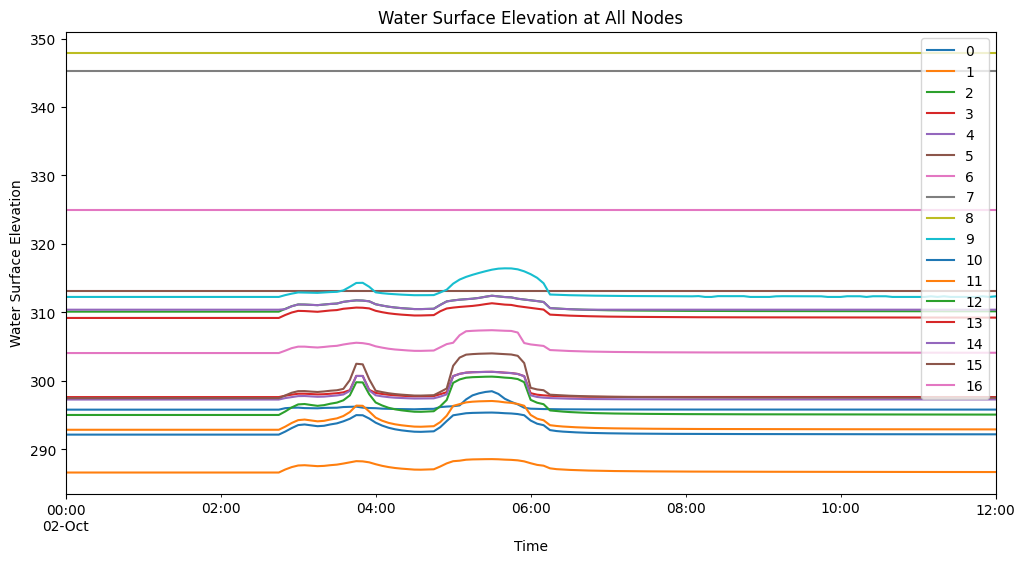

In [8]:
WSE.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Water Surface Elevation")
plt.title("Water Surface Elevation at All Nodes")
plt.show()

#### 1.1.2 Flow from 2D cells to 1D nodes (Units: ft^3/s)
##### To see the connections between 1D to 2D open Node1D_to_Node2D_Links.shp file

In [9]:
Inlet_Flow = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Drop Inlet Flow'])
column_names = [str(i) for i in range(Inlet_Flow.shape[1])]
Inlet_Flow = pd.DataFrame(Inlet_Flow, columns=column_names)
Inlet_Flow.insert(0, "Time", time_list)
Inlet_Flow = Inlet_Flow.set_index('Time')
Inlet_Flow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Time,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.0,0.0,-0.000000,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.0,-0.000000
2025-10-02 00:05:00,0.0,0.0,-0.000000,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.0,-0.000000
2025-10-02 00:10:00,0.0,0.0,-0.000000,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.0,-0.000000
2025-10-02 00:15:00,0.0,0.0,-0.000000,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.0,-0.000000
2025-10-02 00:20:00,0.0,0.0,-0.000000,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.0,0.0,0.006056,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.000770,-0.0,0.0,0.000471,0.001469,0.0,0.000330
2025-10-02 11:45:00,0.0,0.0,0.005889,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.000752,-0.0,0.0,0.000461,0.001438,0.0,0.000319
2025-10-02 11:50:00,0.0,0.0,0.005725,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.000734,-0.0,0.0,0.000451,0.001408,0.0,0.000308


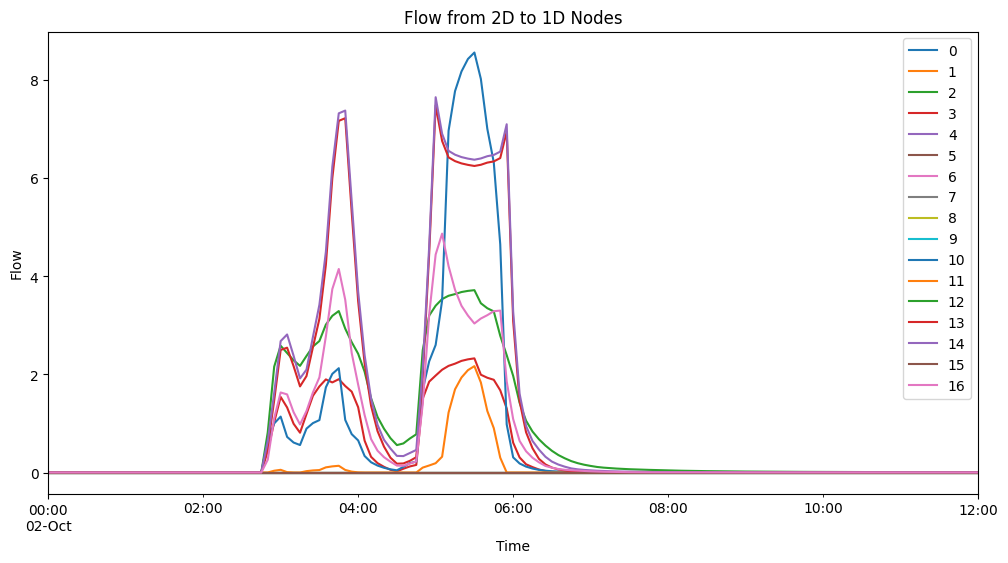

In [10]:
Inlet_Flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow from 2D to 1D Nodes")
plt.show()

#### 1.2 1D Link Features
##### To get the location of each 1D link, refer to the Links_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.2.1 Velocity (units: ft/s)

In [11]:
vel_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel DS'])
vel_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel US'])
vel = (vel_DS + vel_US)/2
column_names = [str(i) for i in range(vel.shape[1])]
vel = pd.DataFrame(vel, columns=column_names)
vel.insert(0, "Time", time_list)
vel = vel.set_index('Time')
vel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Time,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,1.028060,1.129270,0.002432,0.000968,0.0,0.0,0.0,0.500380,0.632506,1.014137,0.963414,0.459528,0.661999,1.080090,1.379325,1.180111
2025-10-02 11:45:00,1.018561,1.121211,0.002398,0.000954,0.0,0.0,0.0,0.498221,0.629279,1.005594,0.955915,0.455730,0.658663,1.071929,1.369202,1.171272
2025-10-02 11:50:00,1.009405,1.114744,0.002358,0.000940,0.0,0.0,0.0,1.358115,0.626038,0.996916,0.947565,0.452044,0.655453,1.061924,1.356712,1.157547


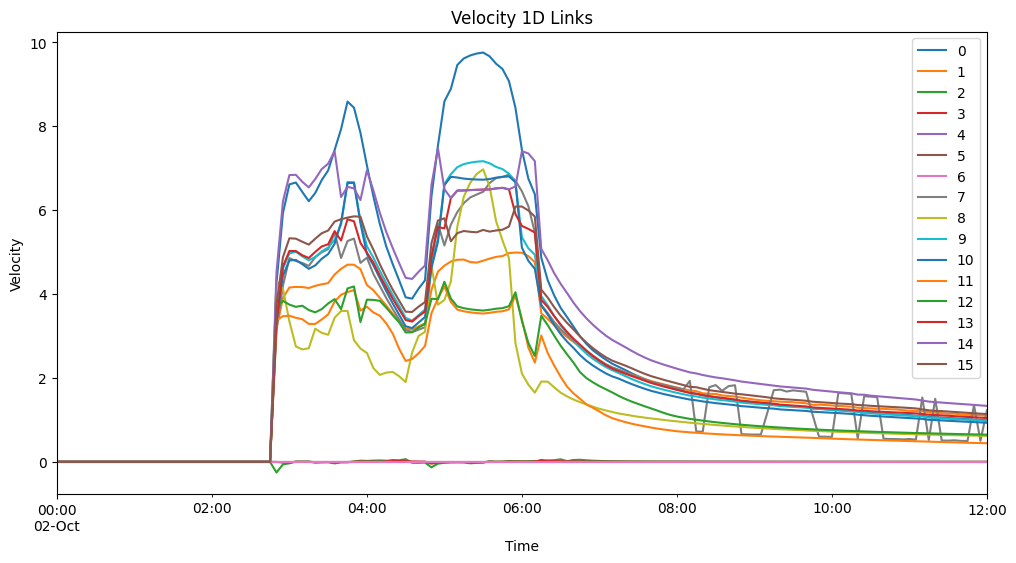

In [12]:
vel.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity 1D Links")
plt.show()

#### 1.2.2 Flow (Units: ft^3/s)

In [13]:
flow_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow DS'])
flow_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow US'])
flow = (flow_DS + flow_US)/2
column_names = [str(i) for i in range(flow.shape[1])]
flow = pd.DataFrame(flow, columns=column_names)
flow.insert(0, "Time", time_list)
flow = flow.set_index('Time')
flow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Time,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:05:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:10:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:15:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:20:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.032121,0.028298,1.871487e-09,5.320984e-10,0.0,0.0,0.0,0.010502,0.000771,0.031281,0.031149,0.000472,0.001470,0.029051,0.028987,0.028681
2025-10-02 11:45:00,0.031350,0.027732,1.802884e-09,5.133184e-10,0.0,0.0,0.0,0.010325,0.000753,0.030541,0.030462,0.000462,0.001439,0.028452,0.028389,0.028088
2025-10-02 11:50:00,0.030619,0.027369,1.732808e-09,4.954569e-10,0.0,0.0,0.0,0.050440,0.000735,0.029799,0.029708,0.000452,0.001409,0.027728,0.027661,0.027178


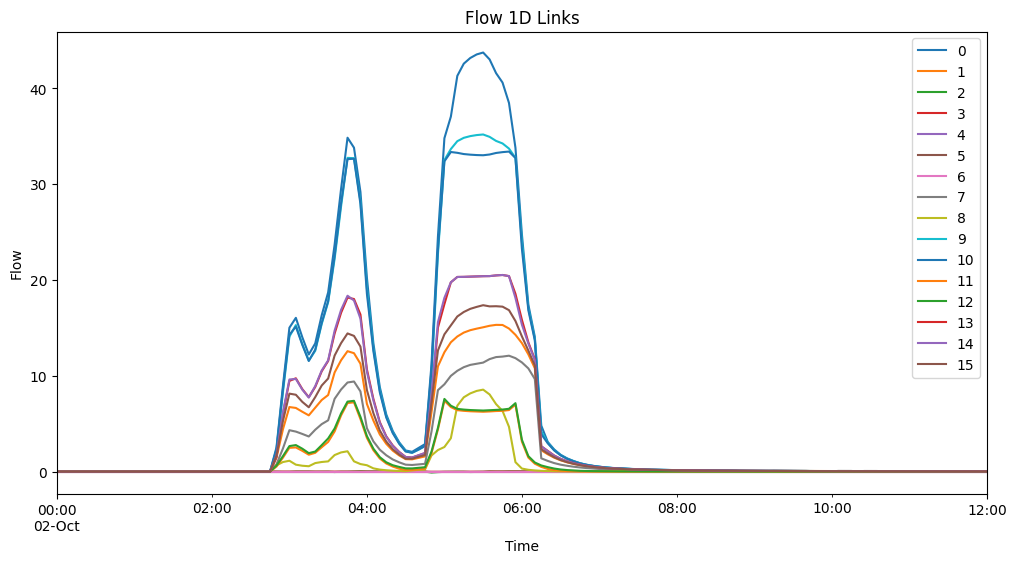

In [14]:
flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow 1D Links")
plt.show()

#### 1.3 2D Node features
##### To see node locations open and see Nodes_2D.shp, type = boundary are boundary nodes
#### 1.3.1 Water Level (Units: ft)

In [15]:
wl=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Water Surface'])
column_names = [str(i) for i in range(wl.shape[1])]
df = pd.DataFrame(wl, columns=column_names)
df.insert(0, "Time", time_list)
df = df.set_index('Time')
df

,0,1,2,3,4,5,6,7,8,9,...,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,329.750122,329.849091,329.693909,329.284271,328.352570,328.083435,327.548279,327.206451,327.263702,328.286926,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:05:00,329.750122,329.849091,329.693909,329.284271,328.352570,328.083435,327.548279,327.206451,327.263702,328.286926,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:10:00,329.750122,329.849091,329.693909,329.284271,328.352570,328.083435,327.548279,327.206451,327.263702,328.286926,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:15:00,329.750122,329.849091,329.693909,329.284271,328.352570,328.083435,327.548279,327.206451,327.263702,328.286926,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:20:00,329.750122,329.849091,329.693909,329.284271,328.352570,328.083435,327.548279,327.206451,327.263702,328.286926,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,329.759430,329.856018,329.703033,329.289978,328.358643,328.089722,327.554932,327.217773,327.272919,328.307922,...,355.320038,334.533508,334.678864,338.087463,293.219879,334.136322,335.669128,357.967346,349.445953,355.320038
2025-10-02 11:45:00,329.759369,329.855988,329.703003,329.289948,328.358612,328.089691,327.554901,327.217682,327.272858,328.307800,...,355.319336,334.533508,334.678864,338.087463,293.219696,334.136322,335.669128,357.967316,349.445923,355.319336
2025-10-02 11:50:00,329.759338,329.855927,329.702942,329.289917,328.358582,328.089661,327.554871,327.217621,327.272797,328.307678,...,355.318665,334.533508,334.678864,338.087463,293.219482,334.136322,335.669128,357.967255,349.445892,355.318665


#### 1.3.2 Water Volume (ft^3)

In [16]:
vol_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Cell Volume'])
column_names = [str(i) for i in range(vol_data.shape[1])]
vol_df = pd.DataFrame(vol_data, columns=column_names)
vol_df.insert(0, "Time", time_list)
vol_df = vol_df.set_index('Time')
vol_df

,0,1,2,3,4,5,6,7,8,9,...,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
2025-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,352.727753,334.533508,334.678864,338.087463,293.149200,334.136322,335.669128,356.890778,349.440094,352.327515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.075862,0.042450,0.050563,0.028606,0.036460,0.041123,0.038021,0.065191,0.049772,0.115264,...,355.320038,334.533508,334.678864,338.087463,293.219879,334.136322,335.669128,357.967346,349.445953,355.320038
2025-10-02 11:45:00,0.075408,0.042195,0.050261,0.028434,0.036242,0.040875,0.037792,0.064792,0.049466,0.114563,...,355.319336,334.533508,334.678864,338.087463,293.219696,334.136322,335.669128,357.967316,349.445923,355.319336
2025-10-02 11:50:00,0.074963,0.041946,0.049965,0.028265,0.036027,0.040632,0.037567,0.064400,0.049167,0.113875,...,355.318665,334.533508,334.678864,338.087463,293.219482,334.136322,335.669128,357.967255,349.445892,355.318665


#### 1.3.3 Rainfall (Units: inch)

In [17]:
# rainfall is cumulative; convert to DataFrame
rainfall = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']
                    ['Unsteady Time Series']['2D Flow Areas'][value]
                    ['Cell Cumulative Precipitation Depth'])

column_names = [str(i) for i in range(rainfall.shape[1])]
rain_df = pd.DataFrame(rainfall, columns=column_names)
rain_df.insert(0, "Time", time_list)
rain_df.set_index("Time", inplace=True)

# 🔻 Compute incremental rainfall (difference between time steps)
rain_increment = rain_df.diff()    # difference between rows
rain_increment.iloc[0] = rain_df.iloc[0]   # first timestep stays as-is

rain_increment

,0,1,2,3,4,5,6,7,8,9,...,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


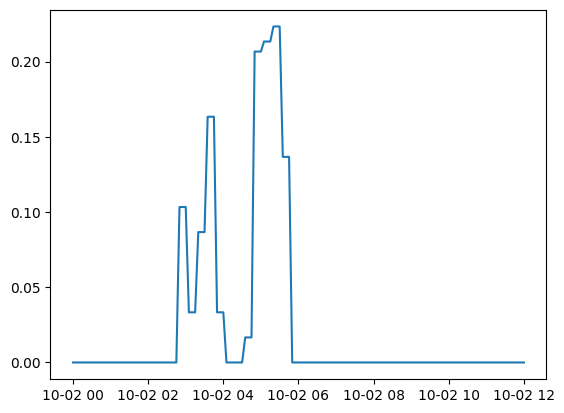

In [18]:
plt.plot(rain_increment['1'])

#### 1.4 2D Link Features
#### 1.4.1 Velocity (Units: ft/s)

In [19]:
vel=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Face Velocity'])
column_names = [str(i) for i in range(vel.shape[1])]
vel_df = pd.DataFrame(vel, columns=column_names)
vel_df.insert(0, "Time", time_list)
vel_df = vel_df.set_index('Time')
vel_df

,0,1,2,3,4,5,6,7,8,9,...,8134,8135,8136,8137,8138,8139,8140,8141,8142,8143
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:05:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:10:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:15:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:20:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.006863,-0.004691,0.0,0.005954,-0.008549,0.006653,0.0,0.004909,-0.0,-0.005383,...,0.108055,0.087591,0.101107,0.008953,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:45:00,0.006808,-0.004653,0.0,0.005907,-0.008480,0.006600,0.0,0.004870,-0.0,-0.005340,...,0.106799,0.086594,0.099938,0.008721,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:50:00,0.006755,-0.004617,0.0,0.005860,-0.008413,0.006548,0.0,0.004832,-0.0,-0.005298,...,0.105595,0.085635,0.098783,0.008496,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.4.2 Flow (Units: ft^3/s)

In [20]:
flow_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Face Flow'])
column_names = [str(i) for i in range(flow_data.shape[1])]
flow_df = pd.DataFrame(flow_data, columns=column_names)
flow_df.insert(0, "Time", time_list)
flow_df = flow_df.set_index('Time')
flow_df

,0,1,2,3,4,5,6,7,8,9,...,8134,8135,8136,8137,8138,8139,8140,8141,8142,8143
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:05:00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:10:00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:15:00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:20:00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.000002,-3.653228e-07,0.0,7.569911e-07,-0.000001,0.000005,0.0,0.000003,0.0,-0.000002,...,0.005441,0.005476,0.005668,0.005627,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:45:00,0.000002,-3.580634e-07,0.0,7.419663e-07,-0.000001,0.000005,0.0,0.000003,0.0,-0.000002,...,0.005285,0.005320,0.005512,0.005474,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:50:00,0.000002,-3.510457e-07,0.0,7.274416e-07,-0.000001,0.000005,0.0,0.000003,0.0,-0.000002,...,0.005139,0.005173,0.005361,0.005326,0.0,0.0,0.0,0.0,0.0,0.0


#### Notes
##### Open each shapefile in Geometry folder in QGIS to visualise the numerical computational mesh/nodes/links. 
##### You may see number of nodes in Nodes_2D.shp is higher than the Mesh_2D.shp
##### This is because HEC-RAS adds additional cells called ghost cells. Except the boundary nodes all other ghost cells can be removed.
##### Similarly all links connecting to or starting from ghost cells can be removed, except those connected to boundary nodes.
##### Boundary nodes are given as type = boundary in Nodes_2D.shp file
##### Following code gives all ghost cell indexes including boundary nodes


In [21]:
# identify ghost cells
min_elevation = np.array(hec['Geometry']['2D Flow Areas'][value]['Cells Minimum Elevation']) 
Ghost_cells_idx = np.where(np.isnan(min_elevation))[0]
Ghost_cells_idx

array([3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714,
       3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725,
       3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736,
       3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747,
       3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758,
       3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769,
       3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780,
       3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791,
       3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802,
       3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813,
       3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824,
       3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835,
       3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846,
       3847, 3848, 3849, 3850, 3851, 3852, 3853, 38